# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Importing the Dataset

In [4]:
data = pd.read_csv("D:\Cereberal_Dataset.csv")

In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
print("\nSummary Statistics:")
print(data.describe(include='all'))


Summary Statistics:
                  id  gender           age  hypertension  heart_disease  \
count   43400.000000   43400  43400.000000  43400.000000   43400.000000   
unique           NaN       2           NaN           NaN            NaN   
top              NaN  Female           NaN           NaN            NaN   
freq             NaN   25670           NaN           NaN            NaN   
mean    36326.142350     NaN     42.217894      0.093571       0.047512   
std     21072.134879     NaN     22.519649      0.291235       0.212733   
min         1.000000     NaN      0.080000      0.000000       0.000000   
25%     18038.500000     NaN     24.000000      0.000000       0.000000   
50%     36351.500000     NaN     44.000000      0.000000       0.000000   
75%     54514.250000     NaN     60.000000      0.000000       0.000000   
max     72943.000000     NaN     82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level           bmi 

# Classification Of Dataset(Numerical or Categorical)

In [8]:
data_types = data.dtypes
print("Data Types of Columns In Dataset:")
print(data_types)

Data Types of Columns In Dataset:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [9]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
categorical_columns = data.select_dtypes(include=['object'])

print("\nNumerical Columns:")
print(numerical_columns)


Numerical Columns:
          id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0      30669   3.0             0              0              95.12  18.0   
1      30468  58.0             1              0              87.96  39.2   
2      16523   8.0             0              0             110.89  17.6   
3      56543  70.0             0              0              69.04  35.9   
4      46136  14.0             0              0             161.28  19.1   
...      ...   ...           ...            ...                ...   ...   
43395  56196  10.0             0              0              58.64  20.4   
43396   5450  56.0             0              0             213.61  55.4   
43397  28375  82.0             1              0              91.94  28.9   
43398  27973  40.0             0              0              99.16  33.2   
43399  36271  82.0             0              0              79.48  20.6   

       stroke  
0           0  
1           0  
2           0  
3  

In [10]:
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
       gender ever_married     work_type Residence_type   smoking_status
0        Male           No      children          Rural              NaN
1        Male          Yes       Private          Urban     never smoked
2      Female           No       Private          Urban              NaN
3      Female          Yes       Private          Rural  formerly smoked
4        Male           No  Never_worked          Rural              NaN
...       ...          ...           ...            ...              ...
43395  Female           No      children          Urban     never smoked
43396  Female          Yes      Govt_job          Urban  formerly smoked
43397  Female          Yes       Private          Urban  formerly smoked
43398    Male          Yes       Private          Urban     never smoked
43399  Female          Yes       Private          Urban     never smoked

[43400 rows x 5 columns]


In [11]:
numerical_column_names = numerical_columns.columns
print("Numerical Column Names: \n")
print(numerical_column_names)

Numerical Column Names: 

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


In [12]:
categorical_column_names = categorical_columns.columns
print("Categorical Column Names: \n")
print(categorical_column_names)

Categorical Column Names: 

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [13]:
num_numerical_columns = len(numerical_columns.columns)
num_categorical_columns = len(categorical_columns.columns)

print("\nNumber of Numerical Columns:", num_numerical_columns)
print("Number of Categorical Columns:", num_categorical_columns)


Number of Numerical Columns: 7
Number of Categorical Columns: 5


# Taking Care Of Missing Values

In [14]:
data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [15]:
missing_values = data.isnull().sum()

for column, count in missing_values.items():
    if count > 0:
        print(f"Column'{column}'has {count} missing value(s).")

Column'bmi'has 1462 missing value(s).
Column'smoking_status'has 13292 missing value(s).


In [16]:
data['smoking_status'].fillna(data['smoking_status'].mode()[0], inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [17]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [18]:
print(data.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# Taking Care Of Duplicate Values

In [19]:
duplicates = data[data.duplicated()]

if not duplicates.empty:
    duplicate_columns = data.columns[data.duplicated(keep=False)]
    print("Columns with Duplicates:")
    print(duplicate_columns)
else:
    print("No duplicates found.")

No duplicates found.


# Dropping The Column

In [20]:
data.drop(['id'], axis='columns', inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     43400 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


# Storing New Data

In [22]:
copied_data = data
copied_data.to_csv('stroke_prediction_cleansed_dataset.csv', index=False)

# Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for column in categorical_columns:
    data[column] = labelencoder.fit_transform(data[column])

data.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,1,14.0,0,0,0,1,0,161.28,19.1,1,0
5,0,47.0,0,0,1,2,1,210.95,50.1,1,0
6,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,0,32.0,0,0,1,2,0,77.67,32.3,2,0
9,0,74.0,1,0,1,3,1,205.84,54.6,1,0


Gender:

    Male -> 1
    Female -> 0

Ever Married:

    Yes -> 1
    No -> 0

Work Type:

    Govt_job -> 0
    Never_worked -> 1
    Private -> 2
    Self-employed -> 3
    Children -> 4

Residence Type:

    Rural -> 0
    Urban -> 1
    
Smoking Status:

    formerly smoked -> 0
    never smoked -> 1
    smokes -> 2

# Data Balance

In [24]:
data['stroke'].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

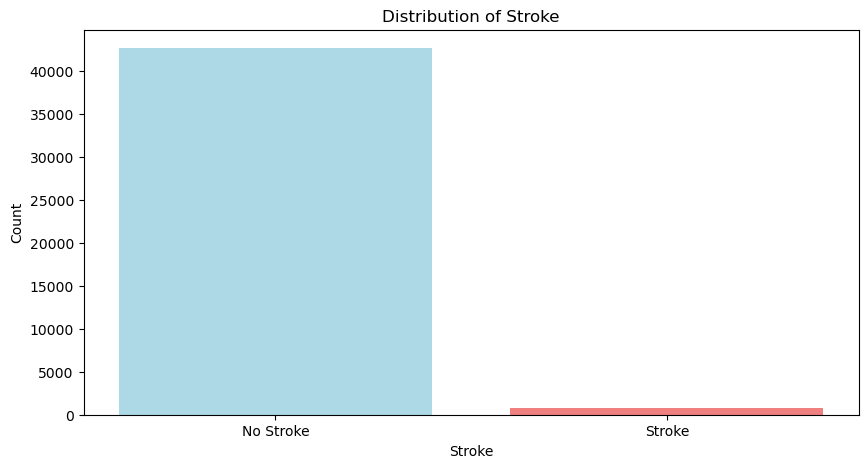

In [25]:
# Bar chart of class distribution for 'stroke' with specific categories
stroke_counts = data['stroke'].value_counts()
labels = stroke_counts.index
values = stroke_counts.values

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color=["lightblue", "lightcoral"])
plt.title("Distribution of Stroke")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No Stroke", "Stroke"], rotation=0)
plt.show()


Oversampling

In [26]:
# Oversampling using SMOTE
X = data.drop(columns=['stroke'])
y = data['stroke']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nOriginal dataset class distribution:\n", y.value_counts())
print("\nResampled dataset class distribution:\n", y_train_resampled.value_counts())


Original dataset class distribution:
 stroke
0    42617
1      783
Name: count, dtype: int64

Resampled dataset class distribution:
 stroke
0    34098
1    34098
Name: count, dtype: int64


In [27]:
resampled_data = pd.concat([pd.DataFrame(X_train_resampled, columns=X.columns), pd.Series(y_train_resampled, name='stroke')], axis=1)
df=resampled_data.to_csv('oversampled_dataset.csv', index=False)

# Handling Outliers

Outlier Detection

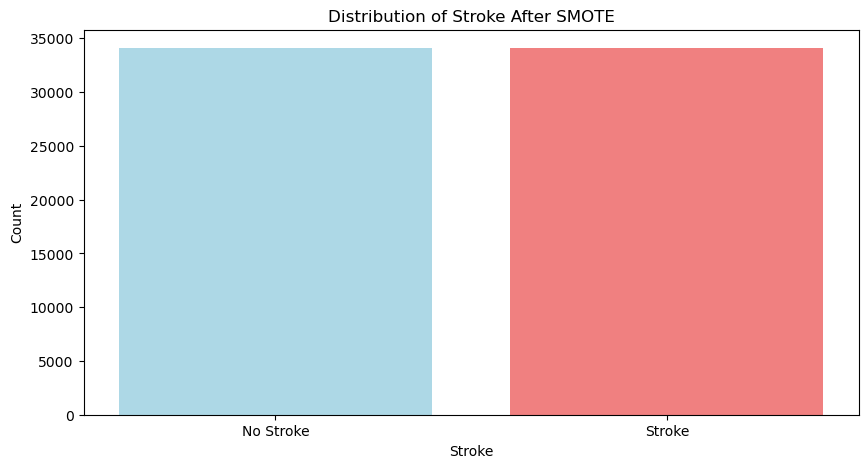

In [28]:
labels_smote = y_train_resampled.value_counts().index
values_smote = y_train_resampled.value_counts().values
plt.figure(figsize=(10, 5))
plt.bar(labels_smote, values_smote, color=["lightblue", "lightcoral"])
plt.title("Distribution of Stroke After SMOTE")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No Stroke", "Stroke"], rotation=0)
plt.show()

In [29]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Function to detect outliers using IQR
def detect_outliers(df, columns):
    outlier_indices = []
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        outliers = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outliers)
    
    outlier_indices = list(set(outlier_indices))  # Remove duplicates
    return outlier_indices

# Detect outliers in the numerical columns
outliers = detect_outliers(data, numerical_columns)
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 9897


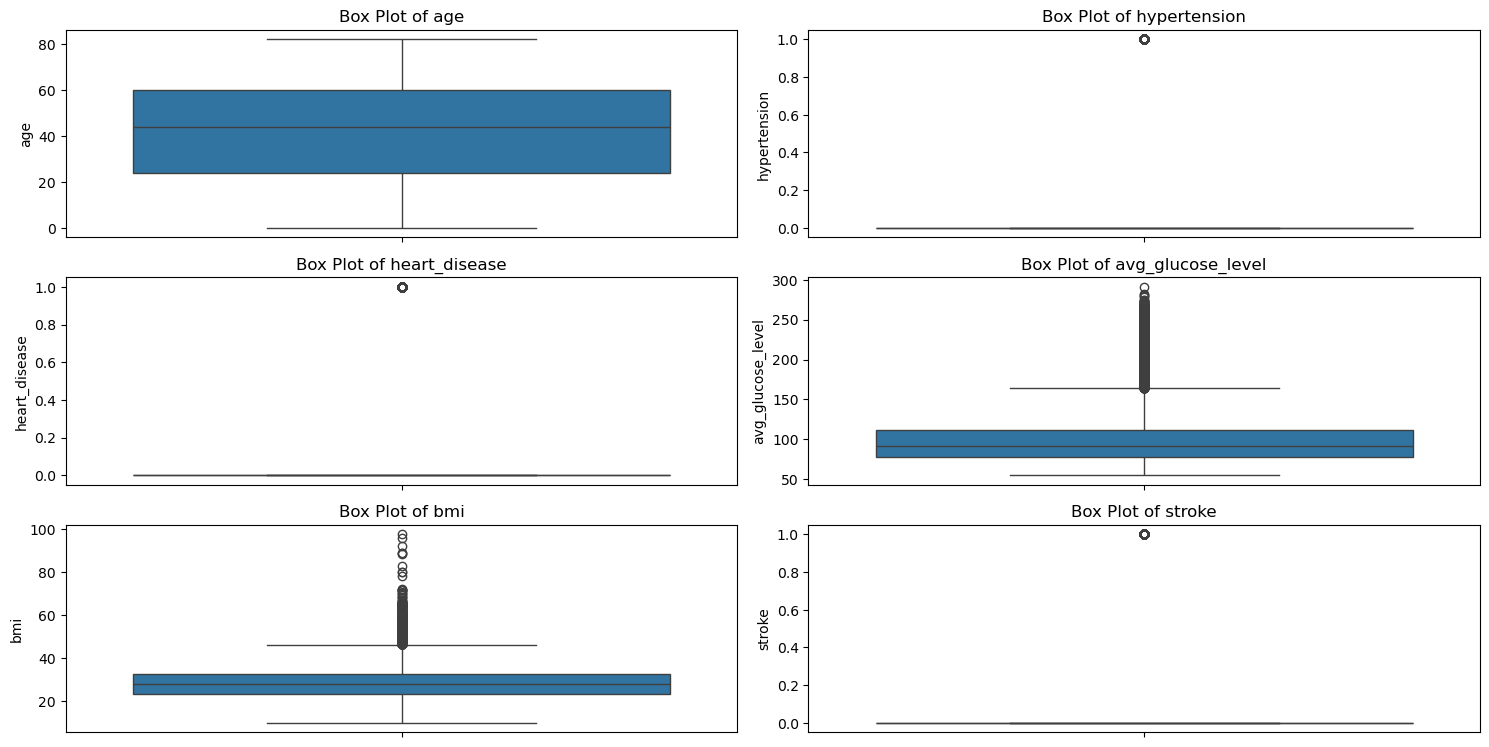

In [30]:
# Visualize the outliers using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 2 + 1, 2, i)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Handling Outliers

In [31]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Function to cap outliers using IQR
def cap_outliers(df, columns):
    df_capped = df.copy()
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_capped[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
    
    return df_capped

data_capped = cap_outliers(data, numerical_columns)

print(f"Shape of data before capping outliers: {data.shape}")
print(f"Shape of data after capping outliers: {data_capped.shape}")


Shape of data before capping outliers: (43400, 11)
Shape of data after capping outliers: (43400, 11)


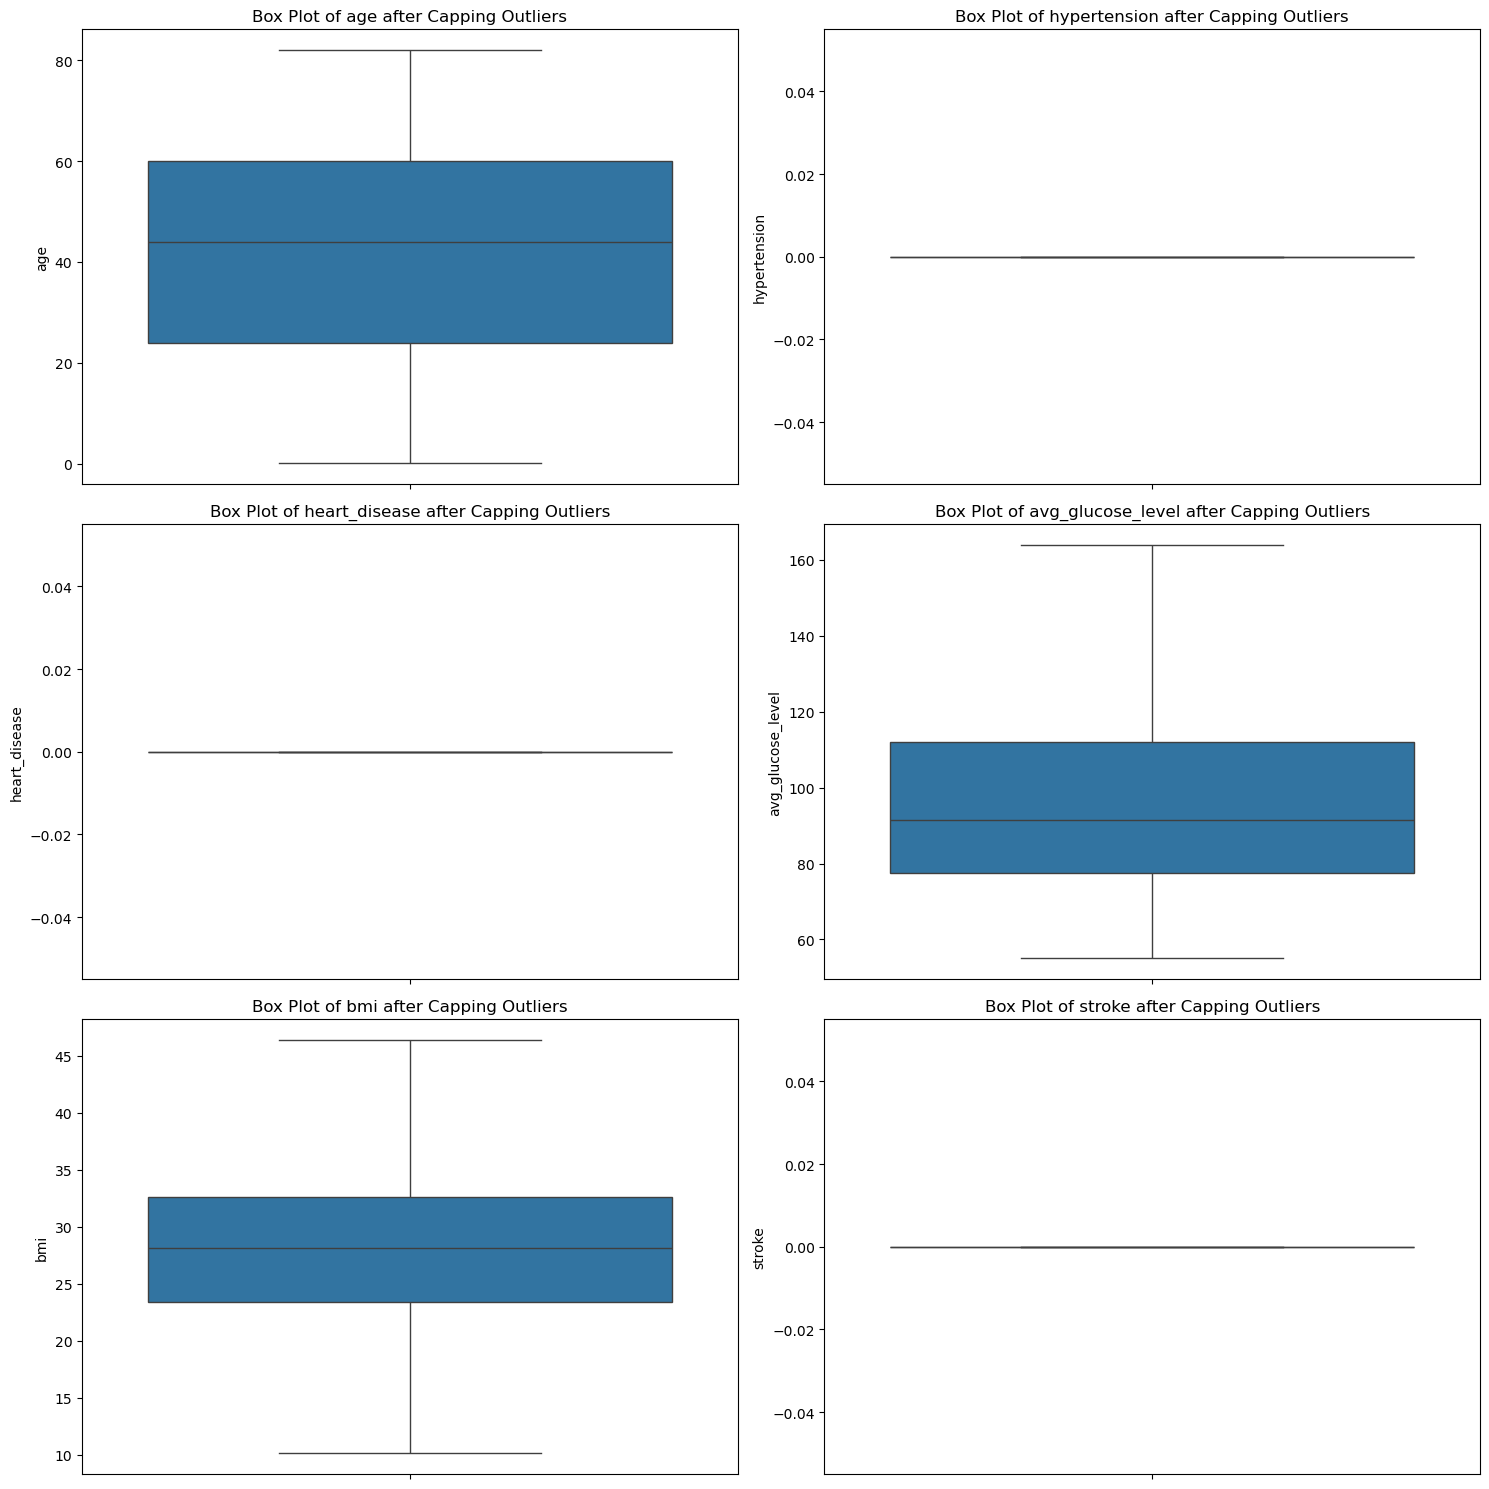

In [32]:
# Visualize the capped data using box plots
num_plots = len(numerical_columns)
num_cols = 2
num_rows = (num_plots // num_cols) + (num_plots % num_cols)

plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=data_capped[col])
    plt.title(f'Box Plot of {col} after Capping Outliers')
    
plt.tight_layout()
plt.show()

According to the boxplot, there are no outliers present. This means that all the values in the dataset fall within the range of the whiskers.

# Data Visualization

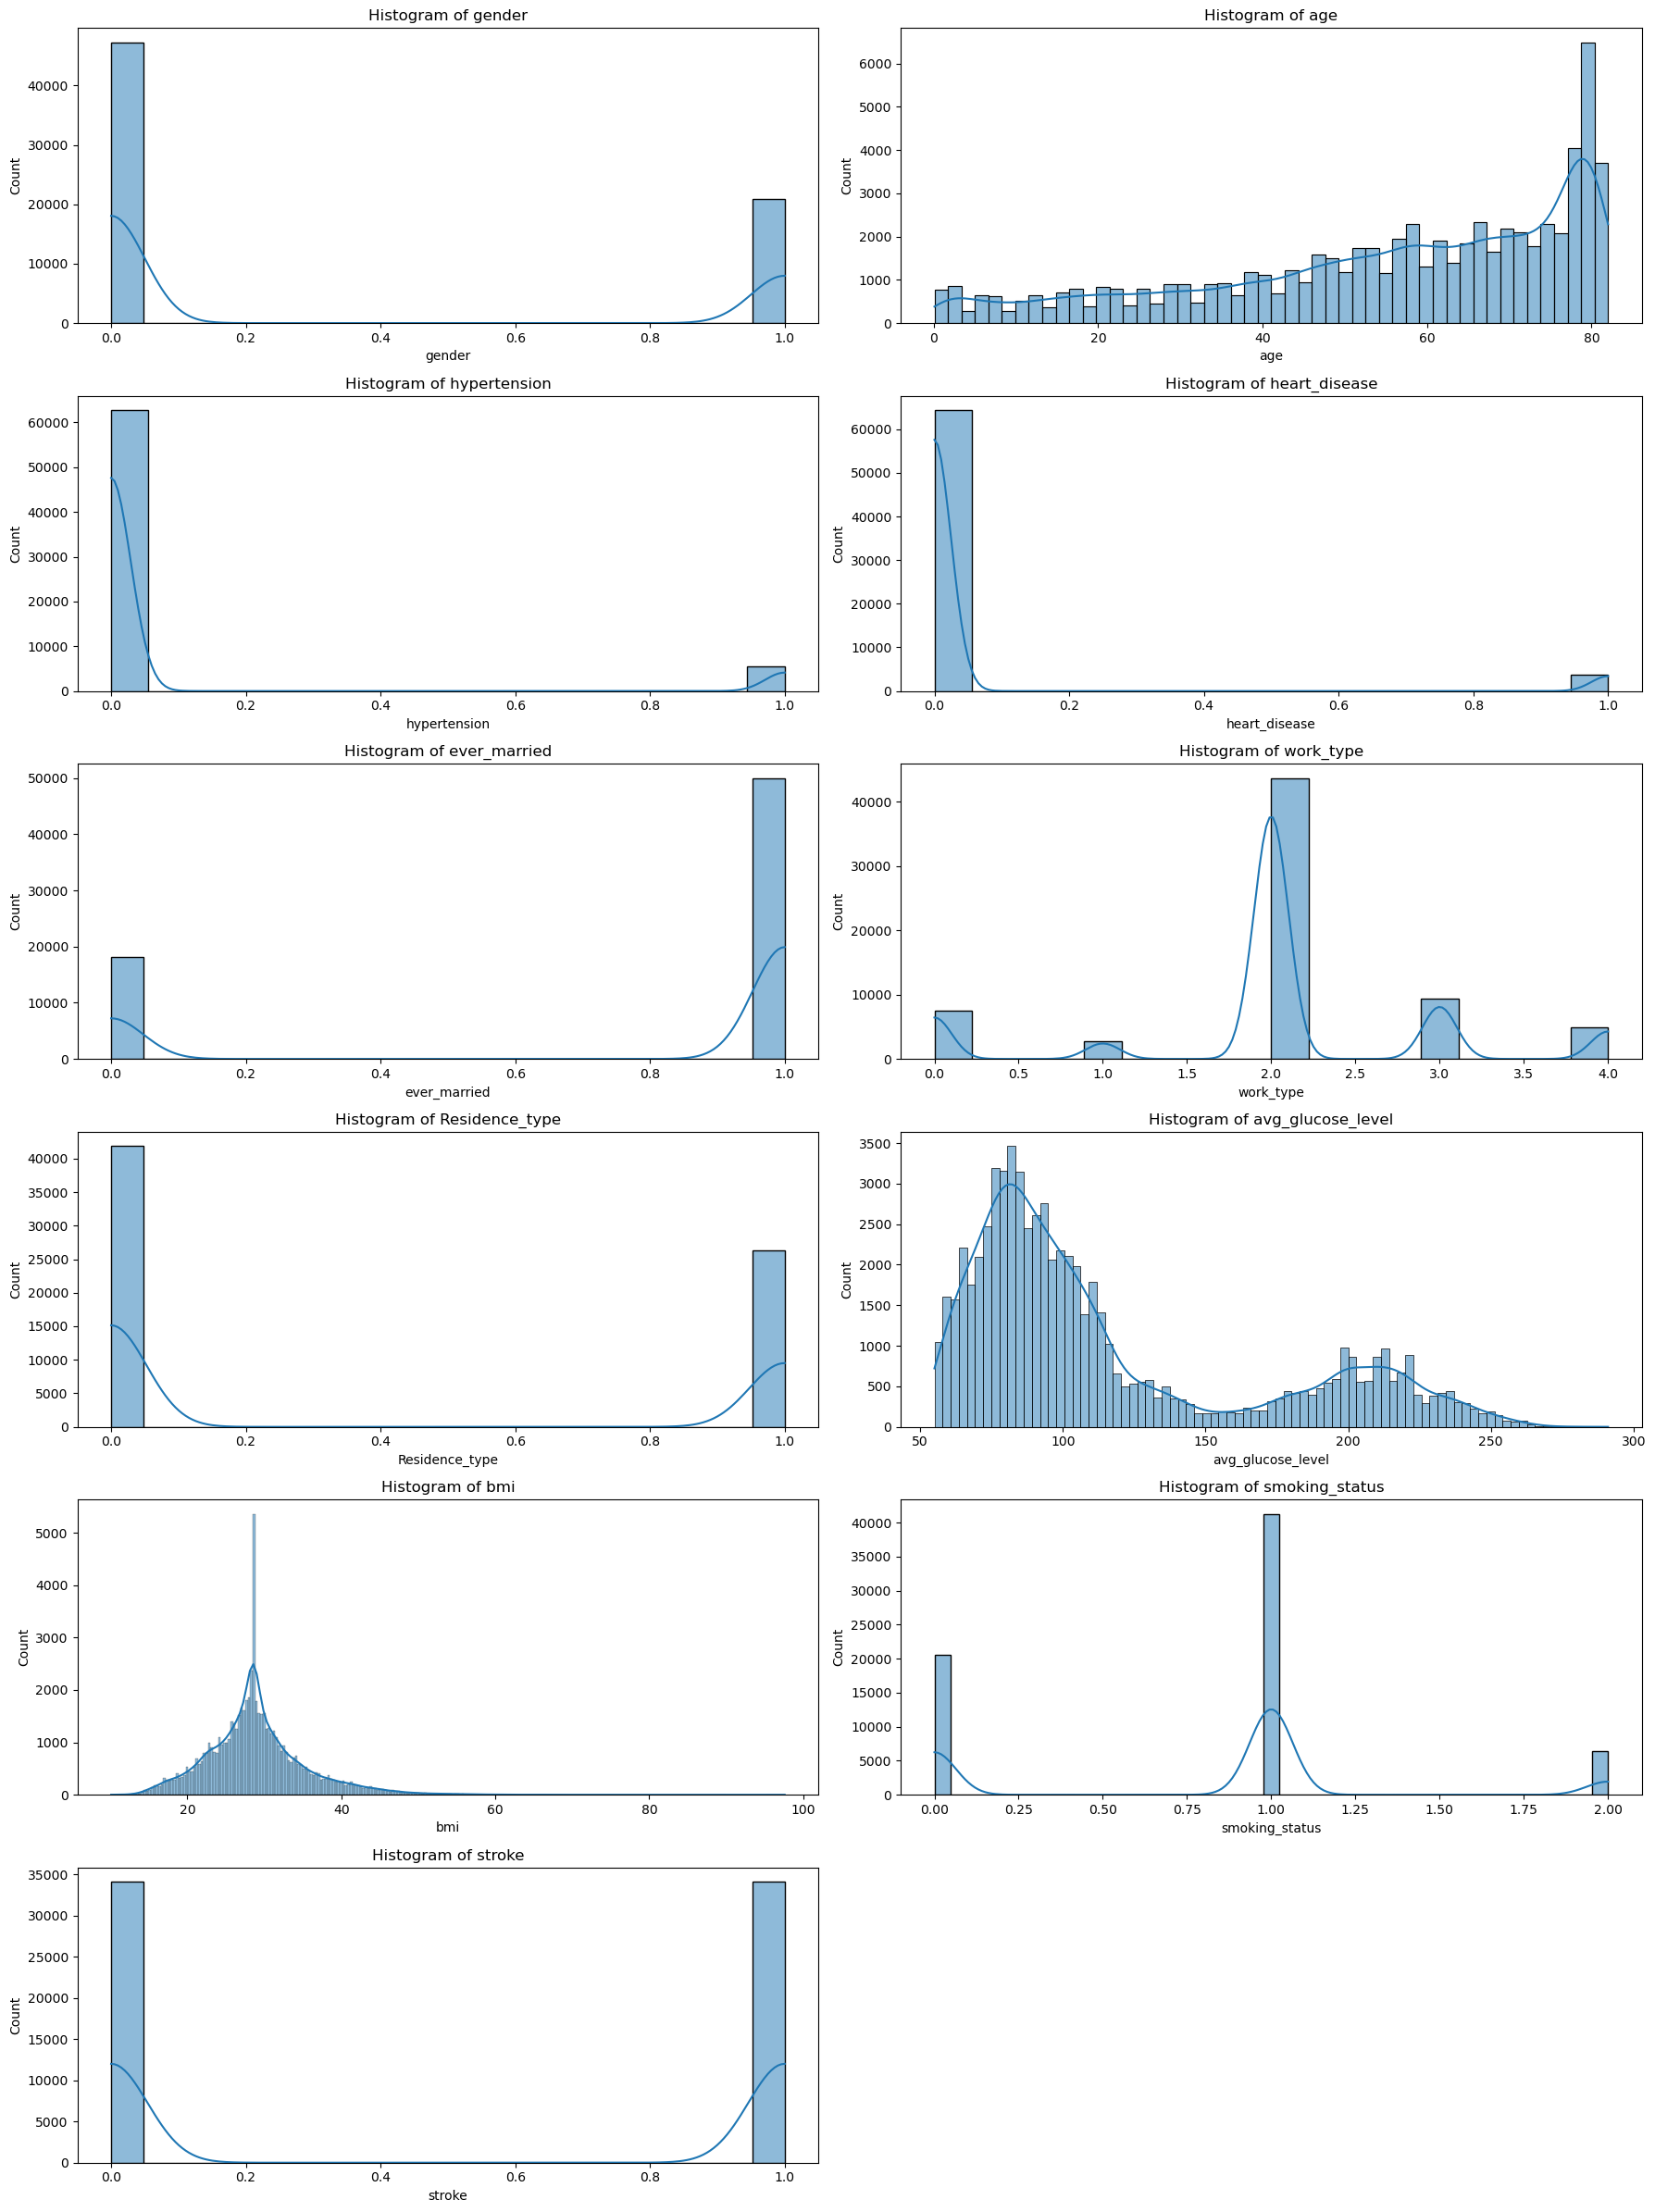

In [33]:
# Load the oversampled dataset
oversampled_data = pd.read_csv('oversampled_dataset.csv')

# Separate numerical and categorical columns
numerical_cols = oversampled_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = oversampled_data.select_dtypes(include=['object', 'bool']).columns

# Plot histograms for numerical columns
plt.figure(figsize=(18, 24))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i)
    sns.histplot(oversampled_data[col], kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


Observations:-

    Gender:The gender distribution shows two distinct categories. There is a higher count of one gender over the other.
    Age:The age distribution is skewed towards older ages, with a significant peak around age 80.
    Hypertension:The majority of the population does not have hypertension, with a small proportion having hypertension.
    Heart Disease:Most individuals do not have heart disease.
    Ever Married:The majority of individuals have been married.
    Work Type:There is a significant peak for one work type, likely indicating the most common employment type in dataset.
    Residence Type:The dataset has an almost equal distribution of urban and rural residence types.
    Avg Glucose Level:the distribution is right-skewed with several peaks,indicating varying glucose levels in population.
    BMI:The BMI distribution shows a right-skewed pattern with a central peak.
    Smoking Status:There are distinct peaks for different smoking statuses, with a significant number marked as 'unknown'.

In [34]:
data.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027692,0.023978,0.082325,-0.031163,0.063856,0.001511,0.035802,-0.021530,-0.009204,0.011313
age,-0.027692,1.000000,0.272169,0.250188,0.693070,-0.366664,0.001299,0.237627,0.352236,-0.112169,0.156049
hypertension,0.023978,0.272169,1.000000,0.119777,0.176575,-0.060800,-0.003124,0.160211,0.153779,-0.030731,0.075332
heart_disease,0.082325,0.250188,0.119777,1.000000,0.128833,-0.021835,-0.002743,0.146938,0.054133,-0.033478,0.113763
ever_married,-0.031163,0.693070,0.176575,0.128833,1.000000,-0.359848,0.004422,0.153607,0.337517,-0.048284,0.071920
work_type,0.063856,-0.366664,-0.060800,-0.021835,-0.359848,1.000000,-0.003473,-0.059303,-0.318601,-0.012727,-0.010800
Residence_type,0.001511,0.001299,-0.003124,-0.002743,0.004422,-0.003473,1.000000,0.000014,-0.003685,0.008323,0.002247
avg_glucose_level,0.035802,0.237627,0.160211,0.146938,0.153607,-0.059303,0.000014,1.000000,0.184199,-0.033584,0.078917
bmi,-0.021530,0.352236,0.153779,0.054133,0.337517,-0.318601,-0.003685,0.184199,1.000000,-0.034339,0.018407
smoking_status,-0.009204,-0.112169,-0.030731,-0.033478,-0.048284,-0.012727,0.008323,-0.033584,-0.034339,1.000000,-0.021675


In [35]:
OSD=oversampled_data

<Axes: >

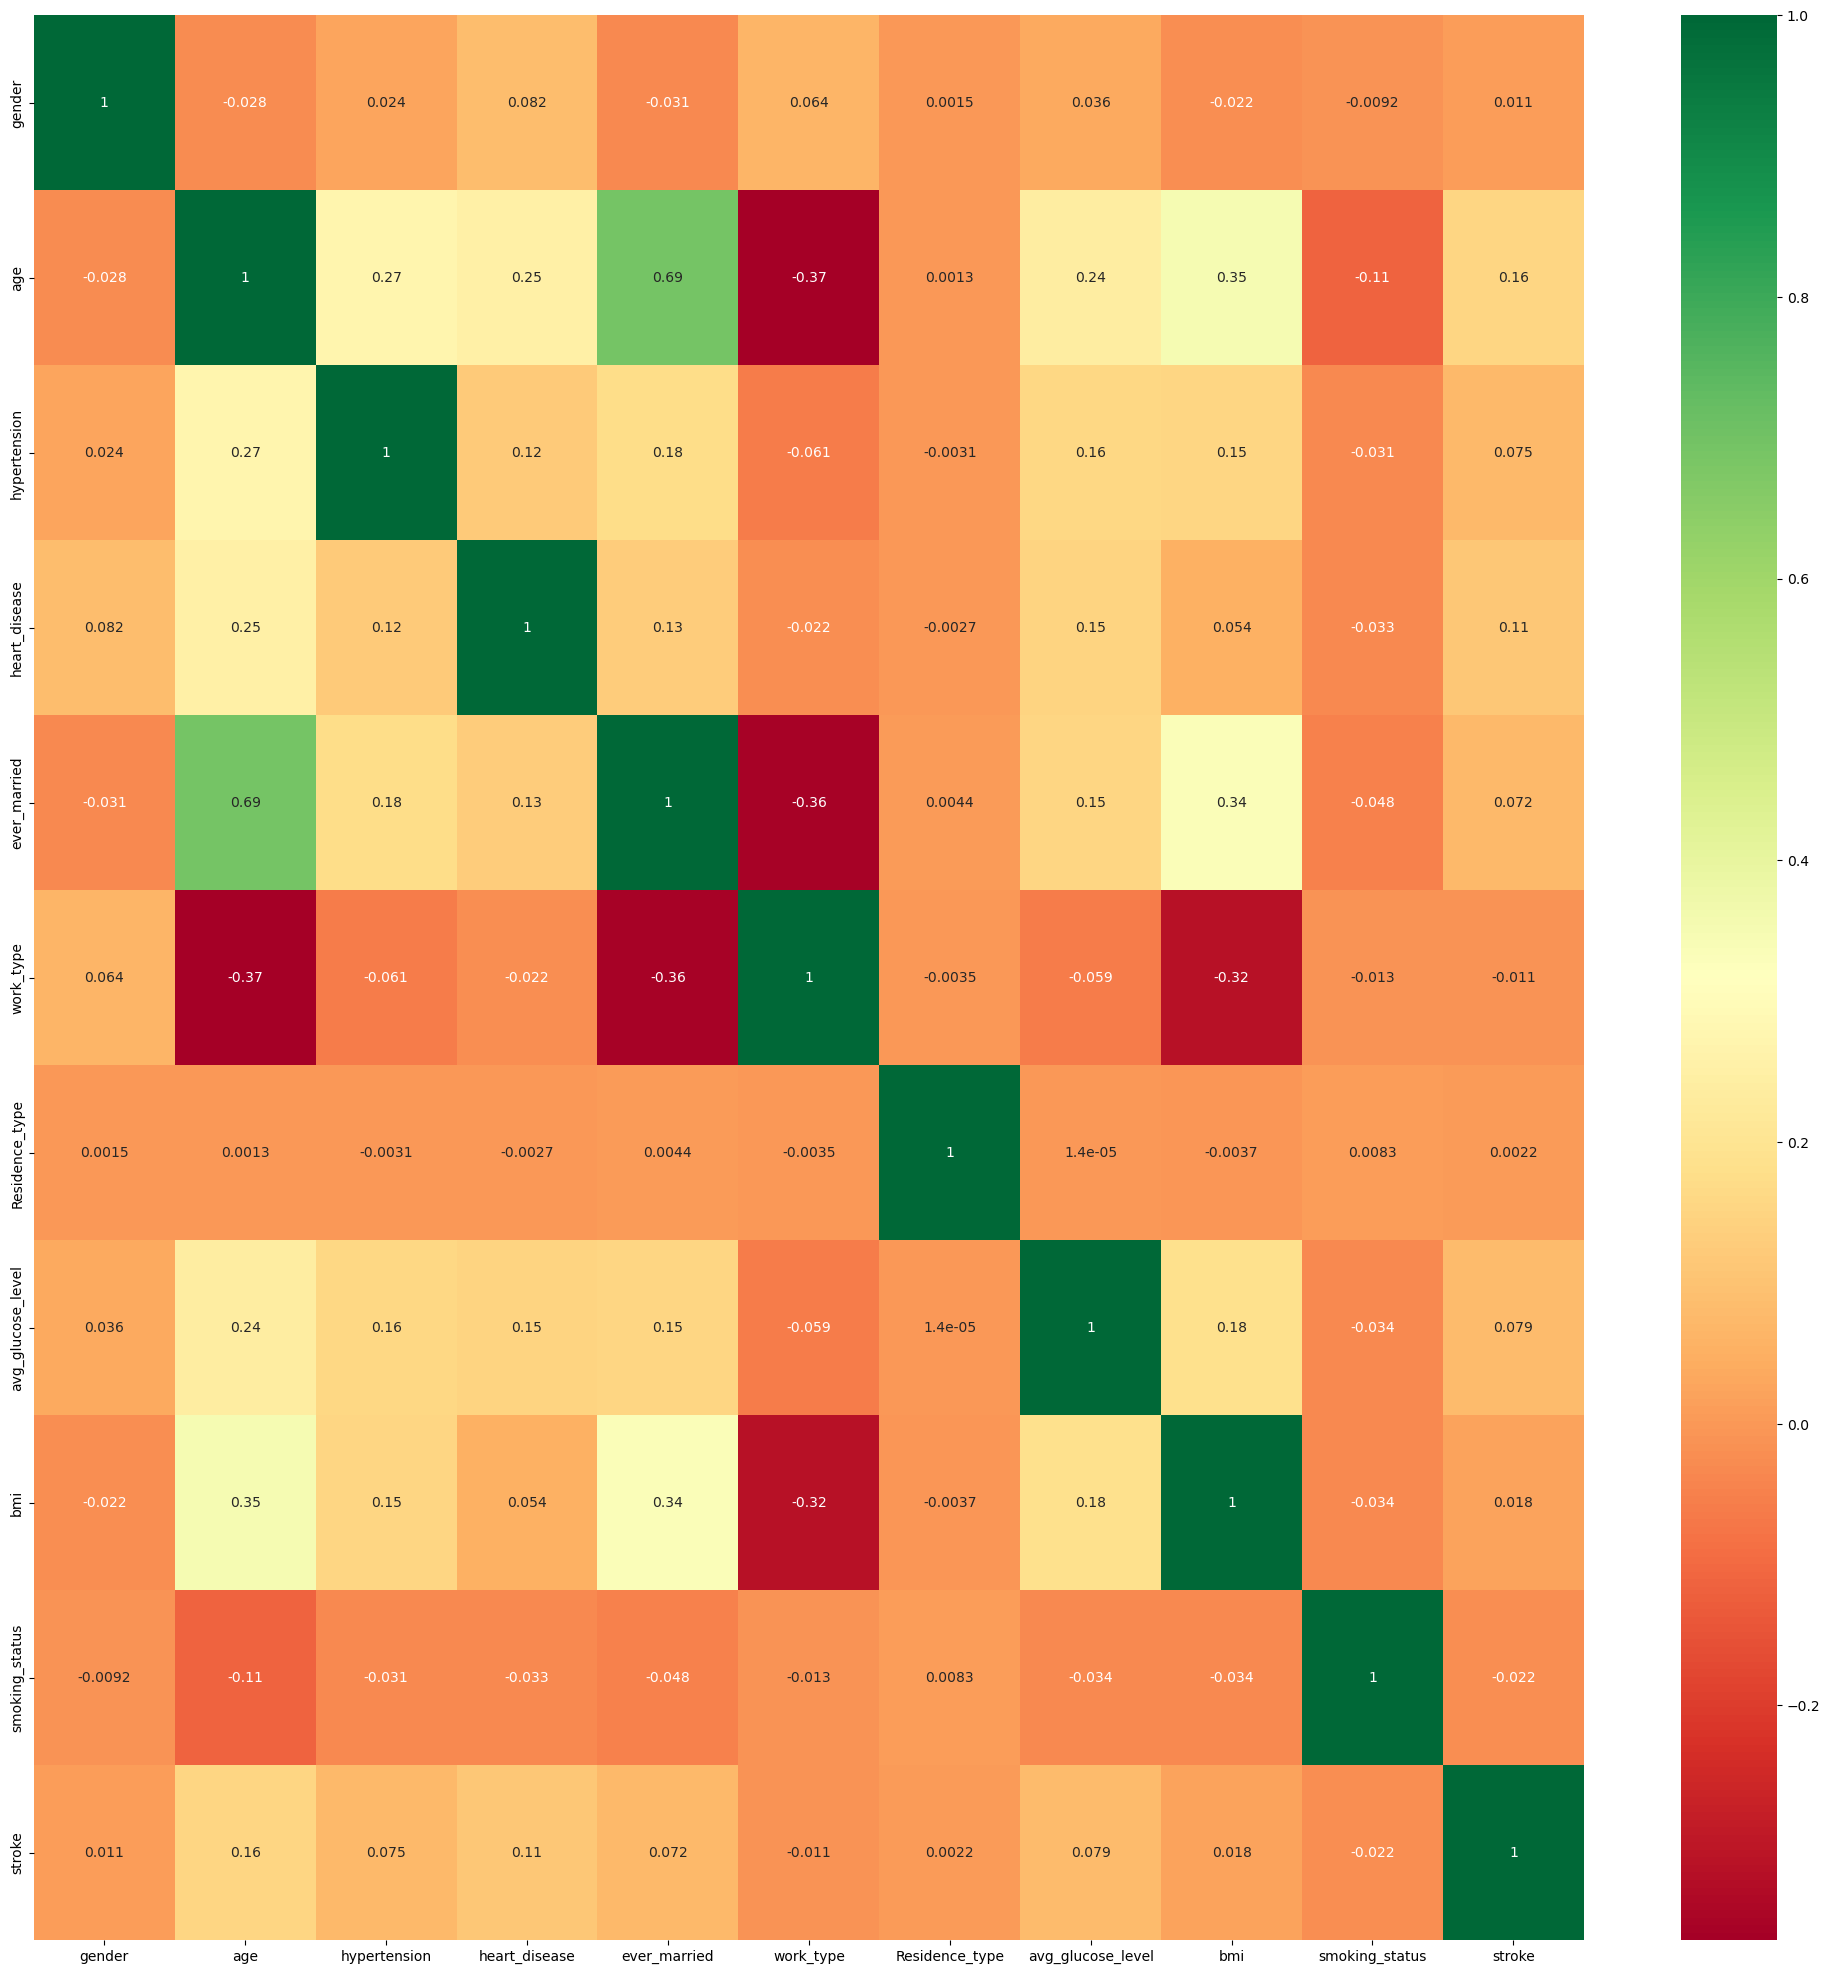

In [36]:
# Create the heat map of the correlation
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

# Feature Selection

# 1.Filter Method

Mutual Information

Mutual Information Scores:
 gender               0.029013
age                  0.538903
hypertension         0.000000
heart_disease        0.000000
ever_married         0.031749
work_type            0.076634
Residence_type       0.031278
avg_glucose_level    0.206371
bmi                  0.575252
smoking_status       0.055439
dtype: float64


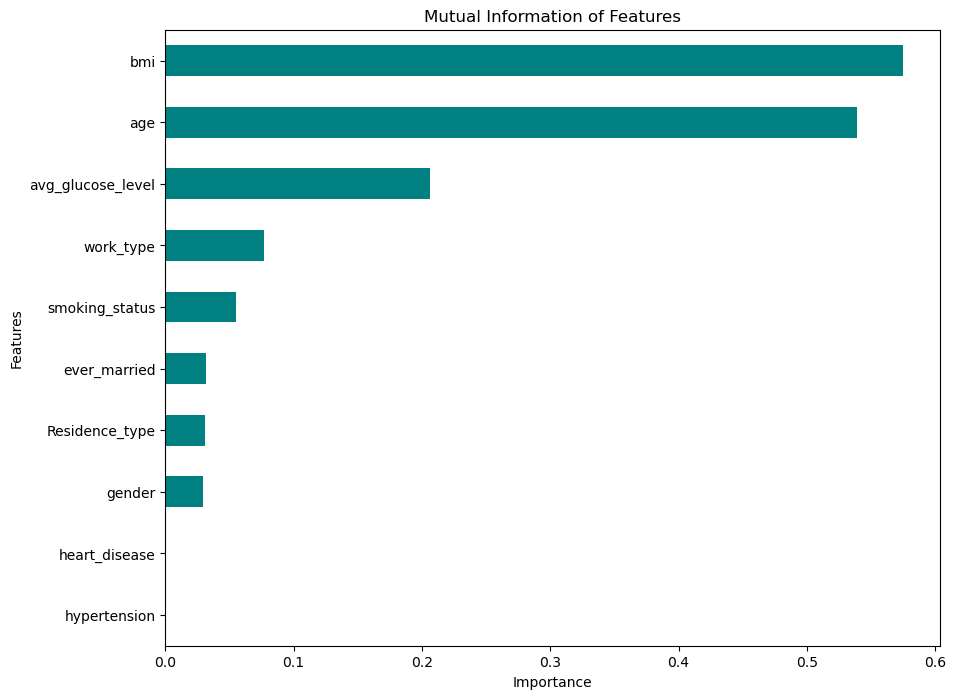

In [37]:
from sklearn.feature_selection import mutual_info_classif

# Extract features and target
X = OSD.drop(columns=['stroke'])
y = OSD['stroke']

# Calculate mutual information
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi,index=X.columns)
plt.figure(figsize=(10,8))
mi_series.sort_values().plot(kind='barh',color='teal')
print("Mutual Information Scores:\n", mi_series)
plt.title('Mutual Information of Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Fisher's Score

fisher_scores_series:
 gender                3589.538140
age                  39646.476909
hypertension            80.789814
heart_disease          174.022469
ever_married          3365.644117
work_type             2030.430220
Residence_type        4013.722283
avg_glucose_level     4143.095122
bmi                    229.293873
smoking_status        7717.532833
dtype: float64


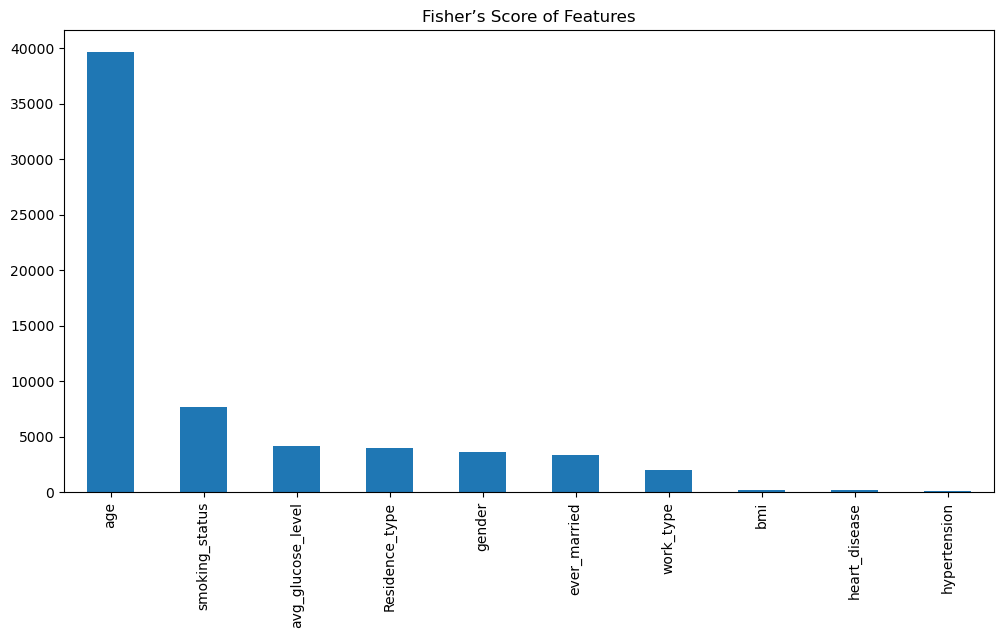

In [38]:
from sklearn.feature_selection import f_classif

# Fisher’s Score
fisher_scores, _ = f_classif(X, y)
fisher_scores_series = pd.Series(fisher_scores, index=X.columns)
fisher_scores_series.sort_values(ascending=False).plot.bar(figsize=(12,6))
print("fisher_scores_series:\n",fisher_scores_series)
plt.title('Fisher’s Score of Features')
plt.show()

# 2. Wrapper Method 

Forward Feature Selection

In [39]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# Forward Feature Selection
forward_selector = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=5, direction='forward')
forward_selector.fit(X, y)
selected_features_forward = X.columns[forward_selector.get_support()]
print("Selected features (Forward Selection):\n", selected_features_forward)

Selected features (Forward Selection):
 Index(['age', 'hypertension', 'ever_married', 'Residence_type',
       'avg_glucose_level'],
      dtype='object')


Backward feature elimination

In [40]:
# Backward feature elimination
sfs_backward = SequentialFeatureSelector(LogisticRegression(), direction='backward', n_features_to_select=5)
sfs_backward.fit(X, y)

# Get selected features
selected_features_backward = X.columns[sfs_backward.get_support()]
print("Selected features by backward elimination:\n", selected_features_backward)


Selected features by backward elimination:
 Index(['gender', 'age', 'Residence_type', 'avg_glucose_level',
       'smoking_status'],
      dtype='object')


# 3. Embedded Method

Random Forest feature importance

Selected features by Random Forest:
 Index(['gender', 'age', 'hypertension', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')


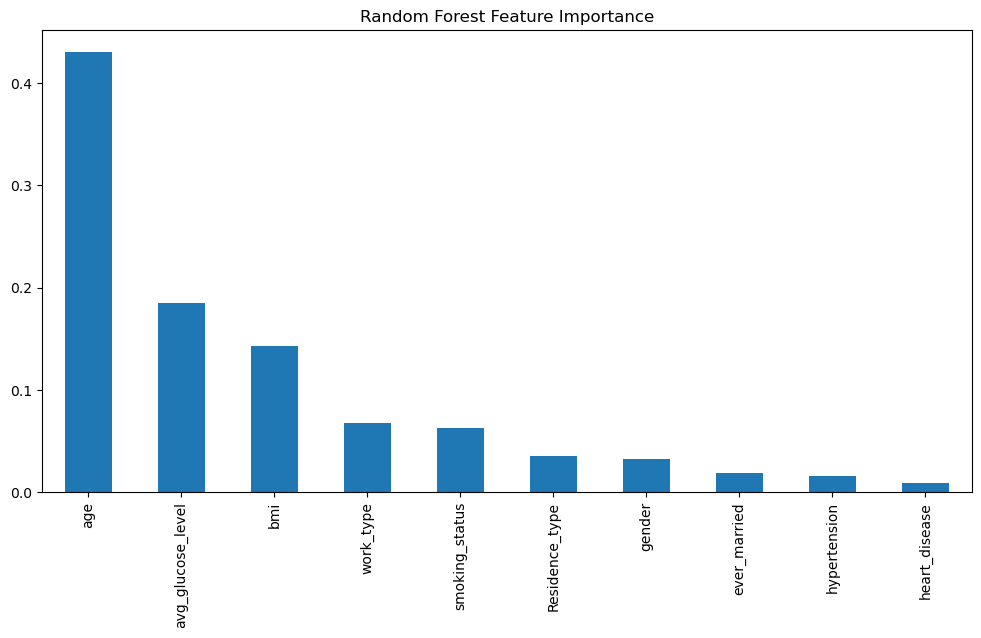

In [41]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
selected_features_rf = feature_importance_rf[feature_importance_rf > 0.01].index
print("Selected features by Random Forest:\n", selected_features_rf)

# Plot feature importances
feature_importance_rf.sort_values(ascending=False).plot.bar(figsize=(12, 6))
plt.title('Random Forest Feature Importance')
plt.show()

# Splitting The Dataset Into The Training Set And Test Set

In [42]:
X=OSD.drop('stroke',axis=1)

Y=OSD['stroke']

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

X_train,Y_train,X_test,Y_test

(       gender        age  hypertension  heart_disease  ever_married  \
 15794       0  41.000000             0              0             1   
 34907       0  79.700802             0              0             1   
 6925        0  45.000000             0              0             1   
 19860       0  14.000000             0              0             0   
 4982        1  15.000000             0              0             0   
 ...       ...        ...           ...            ...           ...   
 37194       1  62.310838             0              0             1   
 6265        1  71.000000             0              0             1   
 54886       0  53.298904             0              0             1   
 860         0  31.000000             0              0             1   
 15795       0  18.000000             0              0             0   
 
        work_type  Residence_type  avg_glucose_level        bmi  smoking_status  
 15794          2               1         100.210000

# Logistic Regression

No Feature Scaling

In [43]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,Y_train)
Y_pred1=log.predict(X_test)
from sklearn.metrics import *
accuracy_score(Y_test,Y_pred1)

0.8133028330107338

In [44]:
precision_score(Y_test,Y_pred1)

0.803236318687493

In [45]:
recall_score(Y_test,Y_pred1)

0.8331002331002331

In [46]:
f1_score(Y_test,Y_pred1)

0.8178957606270382

Mutual Information

In [47]:
# Select features with mutual information greater than a threshold
threshold = 0.002
selected_features = mi_series[mi_series > threshold].index.tolist()
valid_selected_features = [feature for feature in selected_features if feature in X.columns]
print("Valid selected features:\n", valid_selected_features)
#  the dataset with selected features
X_selected = X[valid_selected_features]
# Split the data into training and testing sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_selected, Y, test_size=0.25, random_state=42)

Valid selected features:
 ['gender', 'age', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [48]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train1,Y_train1)
Y_pred2=log.predict(X_test1)
from sklearn.metrics import *
accuracy_score(Y_test1,Y_pred2)

0.8056777523608423

In [49]:
precision_score(Y_test1,Y_pred2)

0.7946738279064564

In [50]:
recall_score(Y_test1,Y_pred2)

0.8277389277389278

In [51]:
f1_score(Y_test1,Y_pred2)

0.8108694411143461

Fisher's Score

In [52]:
selected_features1 = fisher_scores_series.sort_values(ascending=False).index[:5]  # Select top 5 features
print("selected features:\n", selected_features1)
# Subset your X data with selected features
X_selected1 = X[selected_features1]

# Splitting data into training and testing sets 
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_selected1, Y, test_size=0.25, random_state=42)

selected features:
 Index(['age', 'smoking_status', 'avg_glucose_level', 'Residence_type',
       'gender'],
      dtype='object')


In [53]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train2,Y_train2)
Y_pred3=log.predict(X_test2)
from sklearn.metrics import *
accuracy_score(Y_test2,Y_pred3)

0.803683500498563

In [54]:
precision_score(Y_test2,Y_pred3)

0.7897242830251356

In [55]:
recall_score(Y_test2,Y_pred3)

0.8312354312354312

In [56]:
f1_score(Y_test2,Y_pred3)

0.8099483277497019

Forward Feature Selection

In [57]:
X_selected = X[selected_features_forward]

# Splitting data into training and testing sets
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_selected, Y, test_size=0.25, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train3,Y_train3)
Y_pred4=log.predict(X_test3)
from sklearn.metrics import *
accuracy_score(Y_test3,Y_pred4)

0.7965276555809725

In [59]:
precision_score(Y_test3,Y_pred4)

0.7848623341879389

In [60]:
recall_score(Y_test3,Y_pred4)

0.8206293706293706

In [61]:
f1_score(Y_test3,Y_pred4)

0.8023474445900518

Backward feature elimination

In [62]:
X_selected1 = X[selected_features_backward]

# Splitting data into training and testing sets
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X_selected1, Y, test_size=0.25, random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train4,Y_train4)
Y_pred5=log.predict(X_test4)
from sklearn.metrics import *
accuracy_score(Y_test4,Y_pred5)

0.803683500498563

In [64]:
precision_score(Y_test4,Y_pred5)

0.7897242830251356

In [65]:
recall_score(Y_test4,Y_pred5)

0.8312354312354312

In [66]:
f1_score(Y_test4,Y_pred5)

0.8099483277497019

Random Forest feature importance

In [67]:
X_selected = X[selected_features_rf]

# Splitting data into training and testing sets
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X_selected, Y, test_size=0.25, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train5,Y_train5)
Y_pred6=log.predict(X_test5)
from sklearn.metrics import *
accuracy_score(Y_test5,Y_pred6)

0.8116018534811426

In [69]:
precision_score(Y_test,Y_pred6)

0.8021841927493808

In [70]:
recall_score(Y_test5,Y_pred6)

0.8304195804195804

In [71]:
f1_score(Y_test5,Y_pred6)

0.8160577253464666

In [72]:
Final_data=pd.DataFrame({'Methods':['NFS','MI','FS','FFS','BFE','RFFI'],
                         'Accuracy':[accuracy_score(Y_test,Y_pred1),
                                accuracy_score(Y_test1,Y_pred2),
                                accuracy_score(Y_test2,Y_pred3),
                                accuracy_score(Y_test3,Y_pred4),
                                accuracy_score(Y_test4,Y_pred5),
                                accuracy_score(Y_test5,Y_pred6)],
                         'Precision':[precision_score(Y_test,Y_pred1),
                                precision_score(Y_test1,Y_pred2),
                                precision_score(Y_test2,Y_pred3),
                                precision_score(Y_test3,Y_pred4),
                                precision_score(Y_test4,Y_pred5),
                                precision_score(Y_test5,Y_pred6)],
                         'Recall':[recall_score(Y_test,Y_pred1),
                                   recall_score(Y_test1,Y_pred2),
                                   recall_score(Y_test2,Y_pred3),
                                   recall_score(Y_test3,Y_pred4),
                                   recall_score(Y_test4,Y_pred5),
                                   recall_score(Y_test5,Y_pred6)],
                         'F1_Score':[f1_score(Y_test,Y_pred1),
                               f1_score(Y_test1,Y_pred2),
                               f1_score(Y_test2,Y_pred3),
                               f1_score(Y_test3,Y_pred4),
                               f1_score(Y_test4,Y_pred5),
                               f1_score(Y_test5,Y_pred6)]})
Final_data

,Methods,Accuracy,Precision,Recall,F1_Score
0,NFS,0.813303,0.803236,0.833100,0.817896
1,MI,0.805678,0.794674,0.827739,0.810869
2,FS,0.803684,0.789724,0.831235,0.809948
3,FFS,0.796528,0.784862,0.820629,0.802347
4,BFE,0.803684,0.789724,0.831235,0.809948
5,RFFI,0.811602,0.802184,0.830420,0.816058


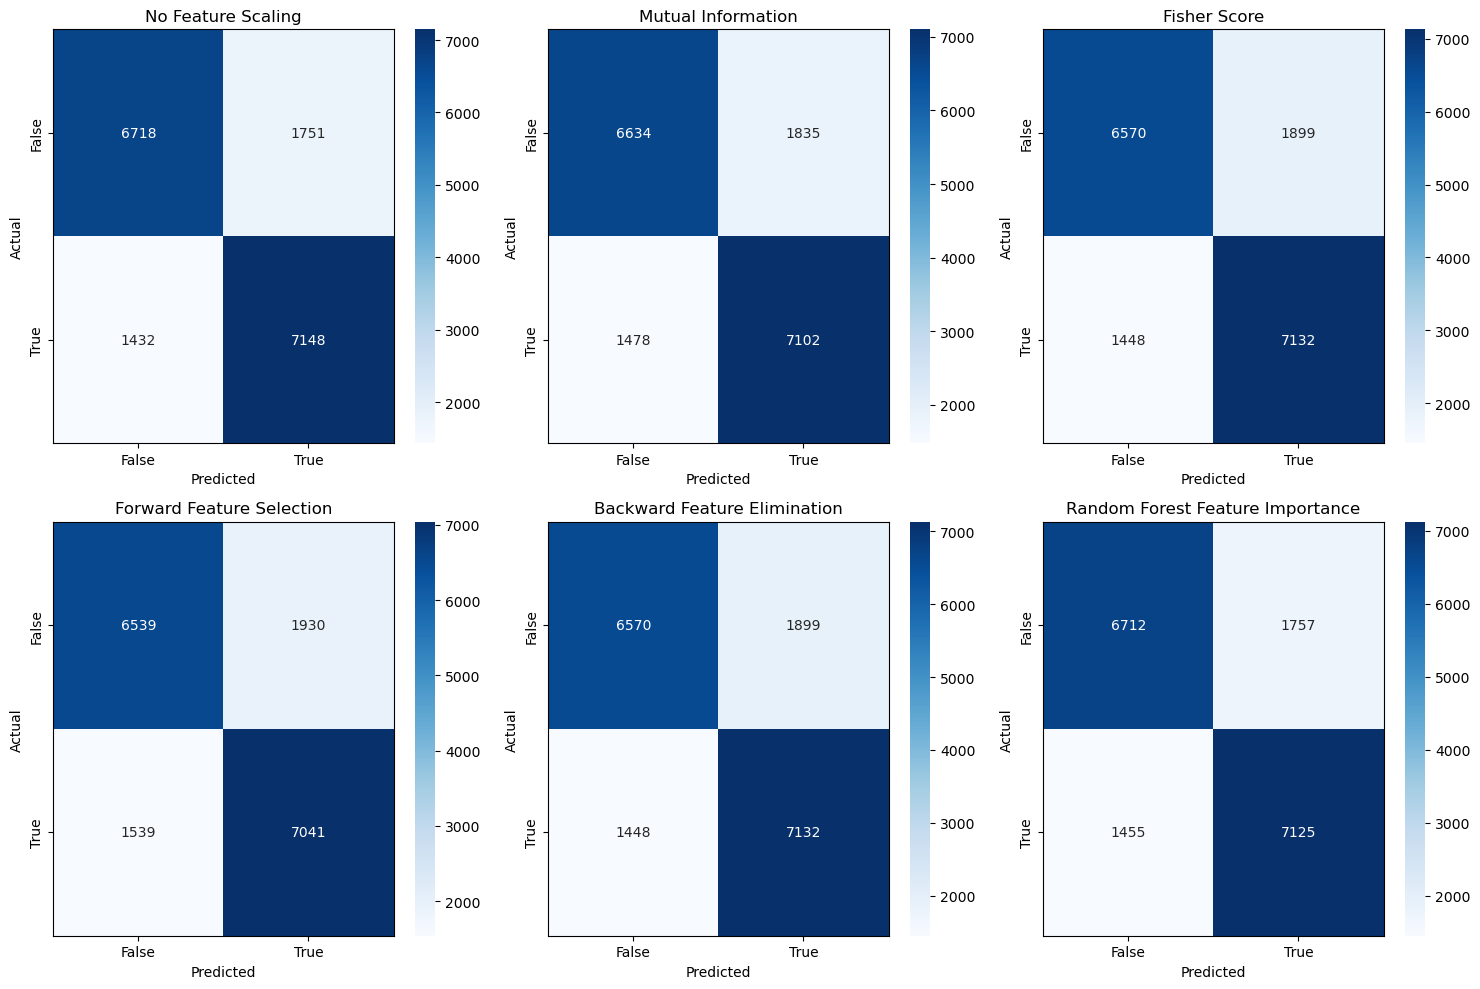

In [73]:
# Initialize cms as an empty dictionary
cms = {}
# Generate confusion matrices for each prediction
models =["No Feature Scaling", "Mutual Information", "Fisher Score", "Forward Feature Selection", "Backward Feature Elimination", 
          "Random Forest Feature Importance"]
for i, Y_pred in enumerate([Y_pred1, Y_pred2, Y_pred3, Y_pred4, Y_pred5, Y_pred6]):
    cms[models[i]] = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrices using Seaborn
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (name, cm) in enumerate(cms.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'],
                yticklabels=['False', 'True'], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_xlabel('Predicted')
    axes[i // 3, i % 3].set_ylabel('Actual')
    axes[i // 3, i % 3].set_title(name)
    
    # Add borders
    axes[i // 3, i % 3].spines['top'].set_visible(True)
    axes[i // 3, i % 3].spines['right'].set_visible(True)
    axes[i // 3, i % 3].spines['bottom'].set_visible(True)
    axes[i // 3, i % 3].spines['left'].set_visible(True)

plt.tight_layout()
plt.show()


# Decision Tree Classifier

No Feature Scaling

In [74]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier()

dt.fit(X_train,Y_train)

Y_pred7=dt.predict(X_test)

accuracy_score(Y_test,Y_pred7)

0.9603495806205643

In [75]:
precision_score(Y_test,Y_pred7)

0.9505243958048336

In [76]:
recall_score(Y_test,Y_pred7)

0.9717948717948718

In [77]:
f1_score(Y_test,Y_pred7)

0.9610419548178885

Mutual Information

In [78]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier()

dt.fit(X_train1,Y_train1)

Y_pred8=dt.predict(X_test1)

accuracy_score(Y_test1,Y_pred8)

0.9578860930259839

In [79]:
precision_score(Y_test1,Y_pred8)

0.9484371435090121

In [80]:
recall_score(Y_test1,Y_pred8)

0.968997668997669

In [81]:
f1_score(Y_test1,Y_pred8)

0.9586071716822322

Fisher's Score

In [82]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier()

dt.fit(X_train2,Y_train2)

Y_pred9=dt.predict(X_test2)

accuracy_score(Y_test2,Y_pred9)

0.9639861575458971

In [83]:
precision_score(Y_test2,Y_pred9)

0.9634628810798231

In [84]:
recall_score(Y_test2,Y_pred9)

0.965034965034965

In [85]:
f1_score(Y_test2,Y_pred9)

0.9642482822871783

Forward Feature Selection

In [86]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier()

dt.fit(X_train3,Y_train3)

Y_pred10=dt.predict(X_test3)

accuracy_score(Y_test3,Y_pred10)

0.9608774708194029

In [87]:
precision_score(Y_test3,Y_pred10)

0.9600046506220207

In [88]:
recall_score(Y_test3,Y_pred10)

0.9623543123543123

In [89]:
f1_score(Y_test3,Y_pred10)

0.9611780455153949

Backward Feature Elimination

In [90]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier()

dt.fit(X_train4,Y_train4)

Y_pred11=dt.predict(X_test4)

accuracy_score(Y_test4,Y_pred11)

0.9649246290104991

In [91]:
precision_score(Y_test4,Y_pred11)

0.9642857142857143

In [92]:
f1_score(Y_test4,Y_pred11)

0.9651839776432231

Random Forest Feature Importance

In [93]:
from sklearn.tree import DecisionTreeClassifier 

dt=DecisionTreeClassifier()

dt.fit(X_train5,Y_train5)

Y_pred12=dt.predict(X_test5)

accuracy_score(Y_test5,Y_pred12)

0.9609361252859405

In [94]:
precision_score(Y_test5,Y_pred12)

0.950786056049214

In [95]:
recall_score(Y_test5,Y_pred12)

0.9727272727272728

In [96]:
f1_score(Y_test5,Y_pred12)

0.961631524369167

In [97]:
Final_data=pd.DataFrame({'Methods':['NFS','MI','FS','FFS','BFE','RFFI'],
                         'Accuracy':[accuracy_score(Y_test,Y_pred7),
                                accuracy_score(Y_test1,Y_pred8),
                                accuracy_score(Y_test2,Y_pred9),
                                accuracy_score(Y_test3,Y_pred10),
                                accuracy_score(Y_test4,Y_pred11),
                                accuracy_score(Y_test5,Y_pred12)],
                         'Precision':[precision_score(Y_test,Y_pred7),
                                precision_score(Y_test1,Y_pred8),
                                precision_score(Y_test2,Y_pred9),
                                precision_score(Y_test3,Y_pred10),
                                precision_score(Y_test4,Y_pred11),
                                precision_score(Y_test5,Y_pred12)],
                         'Recall':[recall_score(Y_test,Y_pred7),
                                   recall_score(Y_test1,Y_pred8),
                                   recall_score(Y_test2,Y_pred9),
                                   recall_score(Y_test3,Y_pred10),
                                   recall_score(Y_test4,Y_pred11),
                                   recall_score(Y_test5,Y_pred12)],
                         'F1_Score':[f1_score(Y_test,Y_pred7),
                               f1_score(Y_test1,Y_pred8),
                               f1_score(Y_test2,Y_pred9),
                               f1_score(Y_test3,Y_pred10),
                               f1_score(Y_test4,Y_pred11),
                               f1_score(Y_test5,Y_pred12)]})
Final_data

,Methods,Accuracy,Precision,Recall,F1_Score
0,NFS,0.960350,0.950524,0.971795,0.961042
1,MI,0.957886,0.948437,0.968998,0.958607
2,FS,0.963986,0.963463,0.965035,0.964248
3,FFS,0.960877,0.960005,0.962354,0.961178
4,BFE,0.964925,0.964286,0.966084,0.965184
5,RFFI,0.960936,0.950786,0.972727,0.961632


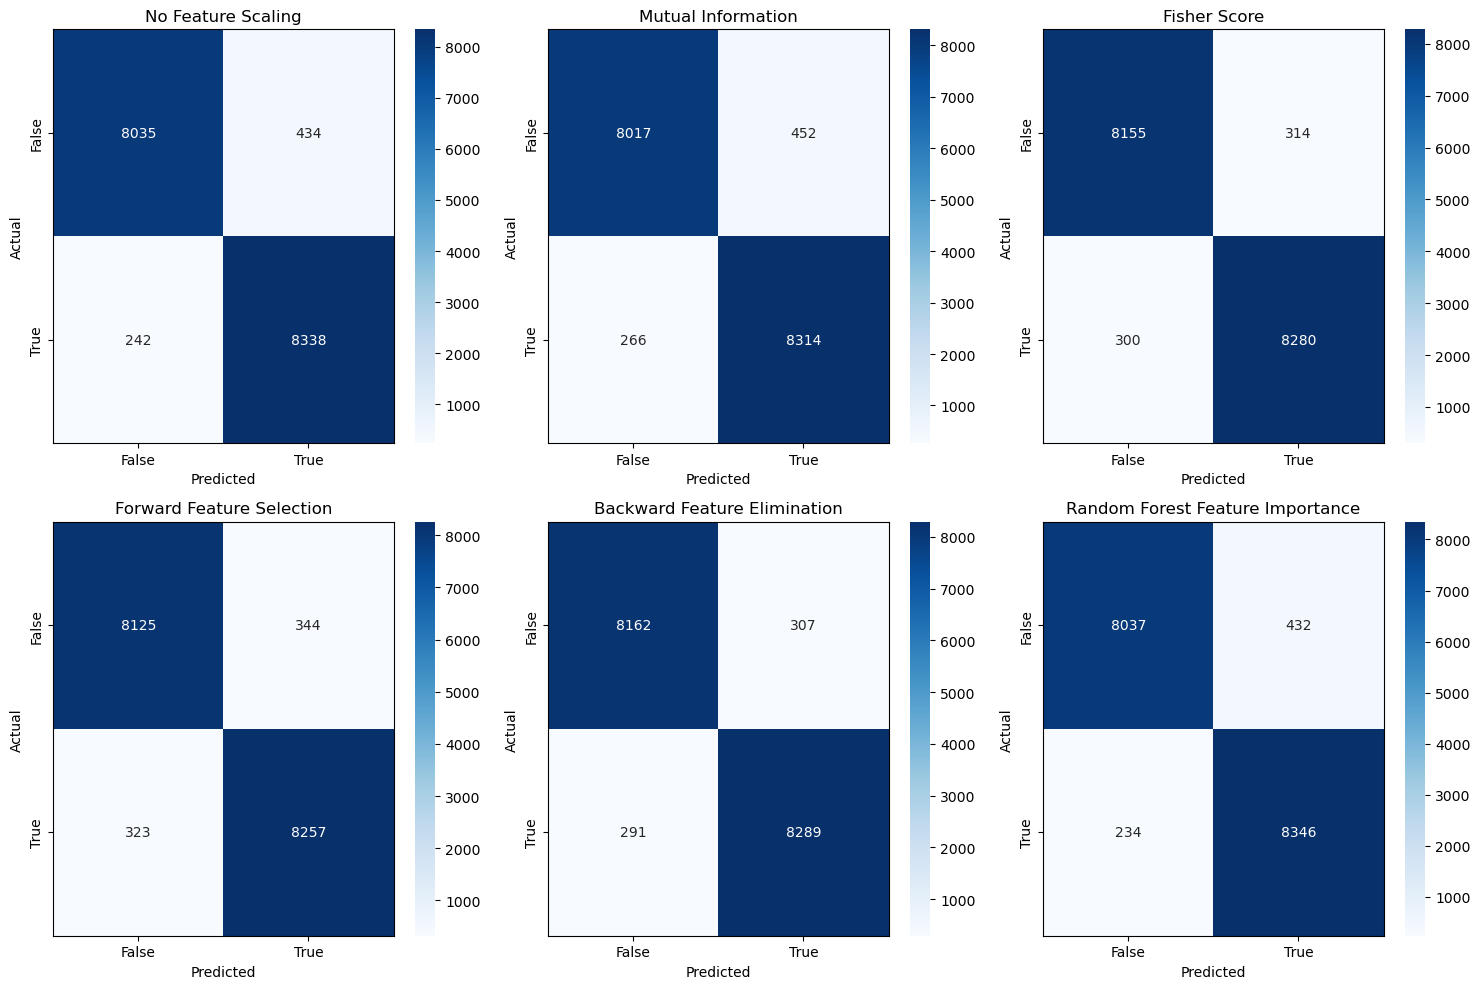

In [98]:
# Initialize cms as an empty dictionary
cms = {}
# Generate confusion matrices for each prediction
models =["No Feature Scaling", "Mutual Information", "Fisher Score", "Forward Feature Selection", "Backward Feature Elimination", 
          "Random Forest Feature Importance"]
for i, Y_pred in enumerate([Y_pred7, Y_pred8, Y_pred9, Y_pred10, Y_pred11, Y_pred12]):
    cms[models[i]] = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrices using Seaborn
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (name, cm) in enumerate(cms.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'],
                yticklabels=['False', 'True'], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_xlabel('Predicted')
    axes[i // 3, i % 3].set_ylabel('Actual')
    axes[i // 3, i % 3].set_title(name)
    
    # Add borders
    axes[i // 3, i % 3].spines['top'].set_visible(True)
    axes[i // 3, i % 3].spines['right'].set_visible(True)
    axes[i // 3, i % 3].spines['bottom'].set_visible(True)
    axes[i // 3, i % 3].spines['left'].set_visible(True)

plt.tight_layout()
plt.show()


# Random Forest Classifier

No Feature Scaling

In [99]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train,Y_train)

Y_pred13=rf.predict(X_test)

accuracy_score(Y_test,Y_pred13)

0.9729016364596164

In [100]:
precision_score(Y_test,Y_pred13)

0.9623006833712984

In [101]:
recall_score(Y_test,Y_pred13)

0.9847319347319348

In [102]:
f1_score(Y_test,Y_pred13)

0.9733870967741935

Mutual Information

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train1,Y_train1)

Y_pred14=rf.predict(X_test1)

accuracy_score(Y_test1,Y_pred14)

0.9703794943984985

In [104]:
precision_score(Y_test1,Y_pred14)

0.9575070821529745

In [105]:
recall_score(Y_test1,Y_pred14)

0.9848484848484849

In [106]:
f1_score(Y_test1,Y_pred14)

0.9709853490376329

Fisher's Score

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train2,Y_train2)

Y_pred15=rf.predict(X_test2)

accuracy_score(Y_test2,Y_pred15)

0.9555985688310165

In [108]:
precision_score(Y_test2,Y_pred15)

0.9535072463768116

In [109]:
recall_score(Y_test2,Y_pred15)

0.9585081585081585

In [110]:
f1_score(Y_test2,Y_pred15)

0.9560011624527753

Forward Feature Selection

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train3,Y_train3)

Y_pred16=rf.predict(X_test3)

accuracy_score(Y_test3,Y_pred16)

0.9530764267698986

In [112]:
precision_score(Y_test3,Y_pred16)

0.9534856609932385

In [113]:
recall_score(Y_test3,Y_pred16)

0.9532634032634033

In [114]:
f1_score(Y_test3,Y_pred16)

0.953374519174729

Backward Feature Elimination

In [115]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train4,Y_train4)

Y_pred17=rf.predict(X_test4)

accuracy_score(Y_test4,Y_pred17)

0.9564197313625432

In [116]:
precision_score(Y_test4,Y_pred17)

0.9523259840701835

In [117]:
recall_score(Y_test4,Y_pred17)

0.9615384615384616

In [118]:
f1_score(Y_test4,Y_pred17)

0.9569100504552572

Random Forest Feature Importance

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train5,Y_train5)

Y_pred18=rf.predict(X_test5)

accuracy_score(Y_test5,Y_pred18)

0.9721391283946272

In [120]:
precision_score(Y_test5,Y_pred18)

0.9607731665719159

In [121]:
recall_score(Y_test5,Y_pred18)

0.9848484848484849

In [122]:
f1_score(Y_test5,Y_pred18)

0.9726618705035971

In [123]:
Final_data=pd.DataFrame({'Methods':['NFS','MI','FS','FFS','BFE','RFFI'],
                         'Accuracy':[accuracy_score(Y_test,Y_pred13),
                                accuracy_score(Y_test1,Y_pred14),
                                accuracy_score(Y_test2,Y_pred15),
                                accuracy_score(Y_test3,Y_pred16),
                                accuracy_score(Y_test4,Y_pred17),
                                accuracy_score(Y_test5,Y_pred18)],
                         'Precision':[precision_score(Y_test,Y_pred13),
                                precision_score(Y_test1,Y_pred14),
                                precision_score(Y_test2,Y_pred15),
                                precision_score(Y_test3,Y_pred16),
                                precision_score(Y_test4,Y_pred17),
                                precision_score(Y_test5,Y_pred18)],
                         'Recall':[recall_score(Y_test,Y_pred13),
                                   recall_score(Y_test1,Y_pred14),
                                   recall_score(Y_test2,Y_pred15),
                                   recall_score(Y_test3,Y_pred16),
                                   recall_score(Y_test4,Y_pred17),
                                   recall_score(Y_test5,Y_pred18)],
                         'F1_Score':[f1_score(Y_test,Y_pred13),
                               f1_score(Y_test1,Y_pred14),
                               f1_score(Y_test2,Y_pred15),
                               f1_score(Y_test3,Y_pred16),
                               f1_score(Y_test4,Y_pred17),
                               f1_score(Y_test5,Y_pred18)]})
Final_data

,Methods,Accuracy,Precision,Recall,F1_Score
0,NFS,0.972902,0.962301,0.984732,0.973387
1,MI,0.970379,0.957507,0.984848,0.970985
2,FS,0.955599,0.953507,0.958508,0.956001
3,FFS,0.953076,0.953486,0.953263,0.953375
4,BFE,0.956420,0.952326,0.961538,0.956910
5,RFFI,0.972139,0.960773,0.984848,0.972662


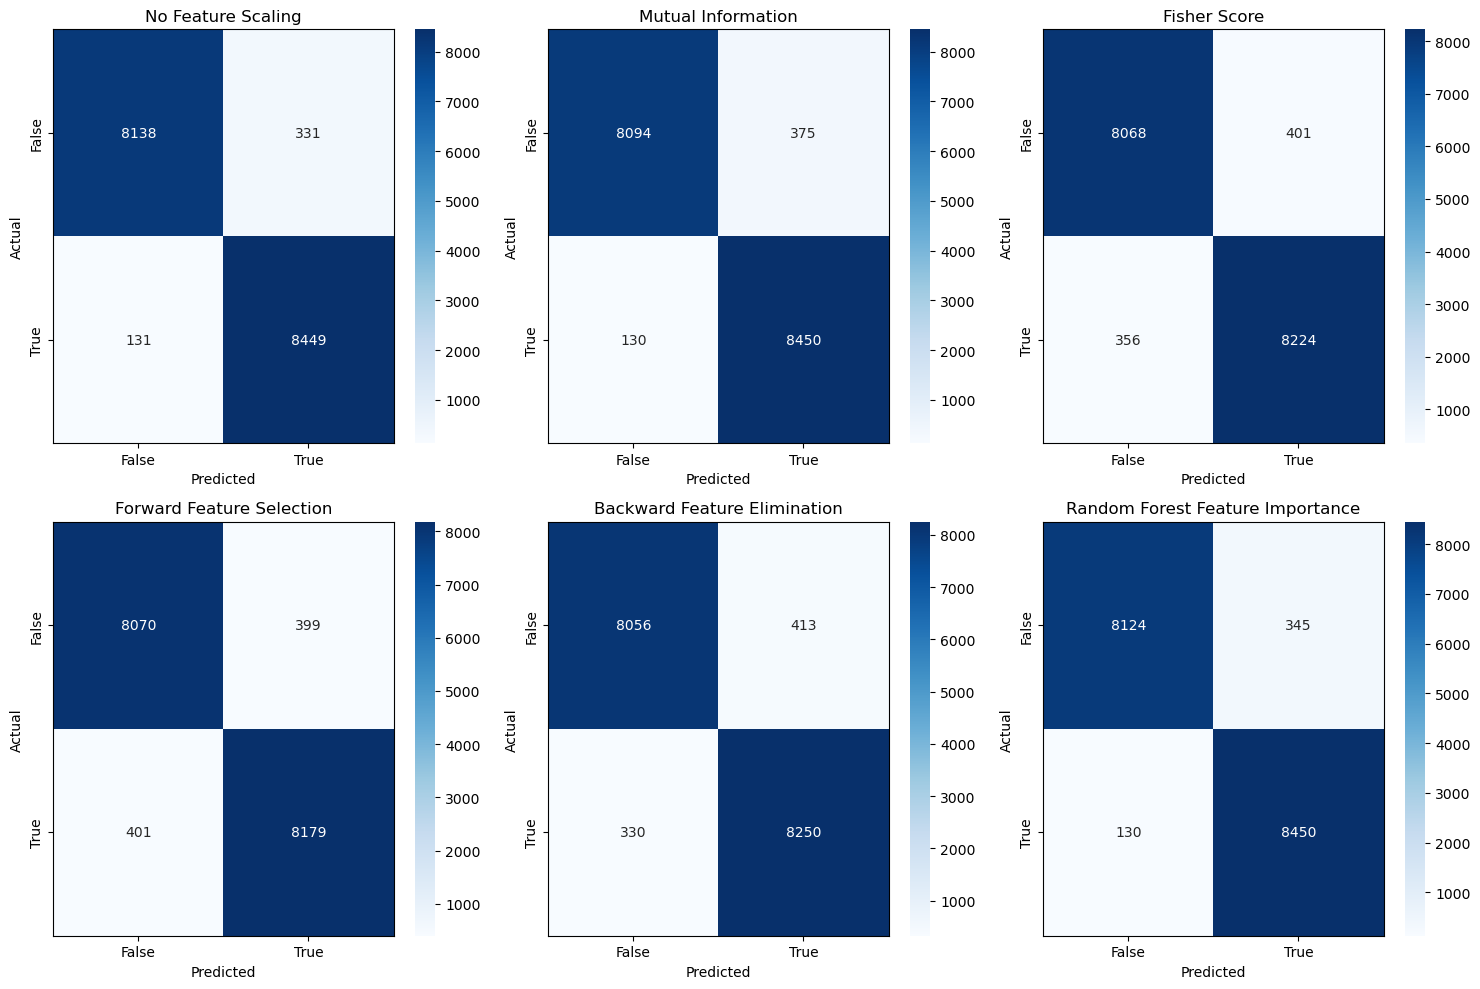

In [124]:
# Initialize cms as an empty dictionary
cms = {}
# Generate confusion matrices for each prediction
models =["No Feature Scaling", "Mutual Information", "Fisher Score", "Forward Feature Selection", "Backward Feature Elimination", 
          "Random Forest Feature Importance"]
for i, Y_pred in enumerate([Y_pred13, Y_pred14, Y_pred15, Y_pred16, Y_pred17, Y_pred18]):
    cms[models[i]] = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrices using Seaborn
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (name, cm) in enumerate(cms.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'],
                yticklabels=['False', 'True'], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_xlabel('Predicted')
    axes[i // 3, i % 3].set_ylabel('Actual')
    axes[i // 3, i % 3].set_title(name)
    
    # Add borders
    axes[i // 3, i % 3].spines['top'].set_visible(True)
    axes[i // 3, i % 3].spines['right'].set_visible(True)
    axes[i // 3, i % 3].spines['bottom'].set_visible(True)
    axes[i // 3, i % 3].spines['left'].set_visible(True)

plt.tight_layout()
plt.show()


# XGBoost Classifier

No Feature Scaling

In [125]:
import xgboost as xgb

xgboost_model = xgb.XGBClassifier()

# Train the model
xgboost_model.fit(X_train, Y_train)

# Make predictions
Y_pred19= xgboost_model.predict(X_test)

# Evaluate the model
accuracy_score(Y_test, Y_pred19)

0.9534870080356619

In [126]:
precision_score(Y_test,Y_pred19)

0.9448189192276933

In [127]:
recall_score(Y_test,Y_pred19)

0.9638694638694638

In [128]:
f1_score(Y_test,Y_pred19)

0.954249120175388

Mutual Information

In [129]:
import xgboost as xgb
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train1, Y_train1)
Y_pred20= xgboost_model.predict(X_test1)

accuracy_score(Y_test1, Y_pred20)

0.9517273740395331

In [130]:
precision_score(Y_test1,Y_pred20)

0.9436120324831294

In [131]:
recall_score(Y_test1,Y_pred20)

0.9615384615384616

In [132]:
f1_score(Y_test1,Y_pred20)

0.9524909080413323

Fisher's Score

In [133]:
import xgboost as xgb
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train2, Y_train2)
Y_pred21= xgboost_model.predict(X_test2)

accuracy_score(Y_test2, Y_pred21)

0.926740571294504

In [134]:
precision_score(Y_test2,Y_pred21)

0.9286633142322536

In [135]:
recall_score(Y_test2,Y_pred21)

0.9255244755244755

In [136]:
f1_score(Y_test2,Y_pred21)

0.9270912381063569

Forward Feature Selection

In [137]:
import xgboost as xgb
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train3, Y_train3)
Y_pred22= xgboost_model.predict(X_test3)

accuracy_score(Y_test3, Y_pred22)

0.9188808727784621

In [138]:
precision_score(Y_test3,Y_pred22)

0.9291592128801431

In [139]:
recall_score(Y_test3,Y_pred22)

0.9080419580419581

In [140]:
f1_score(Y_test3,Y_pred22)

0.9184792219274978

Backward Feature Elimination

In [141]:
import xgboost as xgb
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train4, Y_train4)
Y_pred23= xgboost_model.predict(X_test4)

accuracy_score(Y_test4, Y_pred23)

0.926740571294504

In [142]:
precision_score(Y_test4,Y_pred23)

0.9286633142322536

In [143]:
recall_score(Y_test4,Y_pred23)

0.9255244755244755

In [144]:
f1_score(Y_test4,Y_pred23)

0.9270912381063569

Random Forest Feature Importance

In [145]:
import xgboost as xgb
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train5, Y_train5)
Y_pred24= xgboost_model.predict(X_test5)

accuracy_score(Y_test5, Y_pred24)

0.9521379553052965

In [146]:
precision_score(Y_test5,Y_pred24)

0.9436571428571429

In [147]:
recall_score(Y_test5,Y_pred24)

0.9623543123543123

In [148]:
f1_score(Y_test5,Y_pred24)

0.9529140219272937

In [149]:
Final_data=pd.DataFrame({'Methods':['NFS','MI','FS','FFS','BFE','RFFI'],
                         'Accuracy':[accuracy_score(Y_test,Y_pred19),
                                accuracy_score(Y_test1,Y_pred20),
                                accuracy_score(Y_test2,Y_pred21),
                                accuracy_score(Y_test3,Y_pred22),
                                accuracy_score(Y_test4,Y_pred23),
                                accuracy_score(Y_test5,Y_pred24)],
                         'Precision':[precision_score(Y_test,Y_pred19),
                                precision_score(Y_test1,Y_pred20),
                                precision_score(Y_test2,Y_pred21),
                                precision_score(Y_test3,Y_pred22),
                                precision_score(Y_test4,Y_pred23),
                                precision_score(Y_test5,Y_pred24)],
                         'Recall':[recall_score(Y_test,Y_pred19),
                                   recall_score(Y_test1,Y_pred20),
                                   recall_score(Y_test2,Y_pred21),
                                   recall_score(Y_test3,Y_pred22),
                                   recall_score(Y_test4,Y_pred23),
                                   recall_score(Y_test5,Y_pred24)],
                         'F1_Score':[f1_score(Y_test,Y_pred19),
                               f1_score(Y_test1,Y_pred20),
                               f1_score(Y_test2,Y_pred21),
                               f1_score(Y_test3,Y_pred22),
                               f1_score(Y_test4,Y_pred23),
                               f1_score(Y_test5,Y_pred24)]})
Final_data

,Methods,Accuracy,Precision,Recall,F1_Score
0,NFS,0.953487,0.944819,0.963869,0.954249
1,MI,0.951727,0.943612,0.961538,0.952491
2,FS,0.926741,0.928663,0.925524,0.927091
3,FFS,0.918881,0.929159,0.908042,0.918479
4,BFE,0.926741,0.928663,0.925524,0.927091
5,RFFI,0.952138,0.943657,0.962354,0.952914


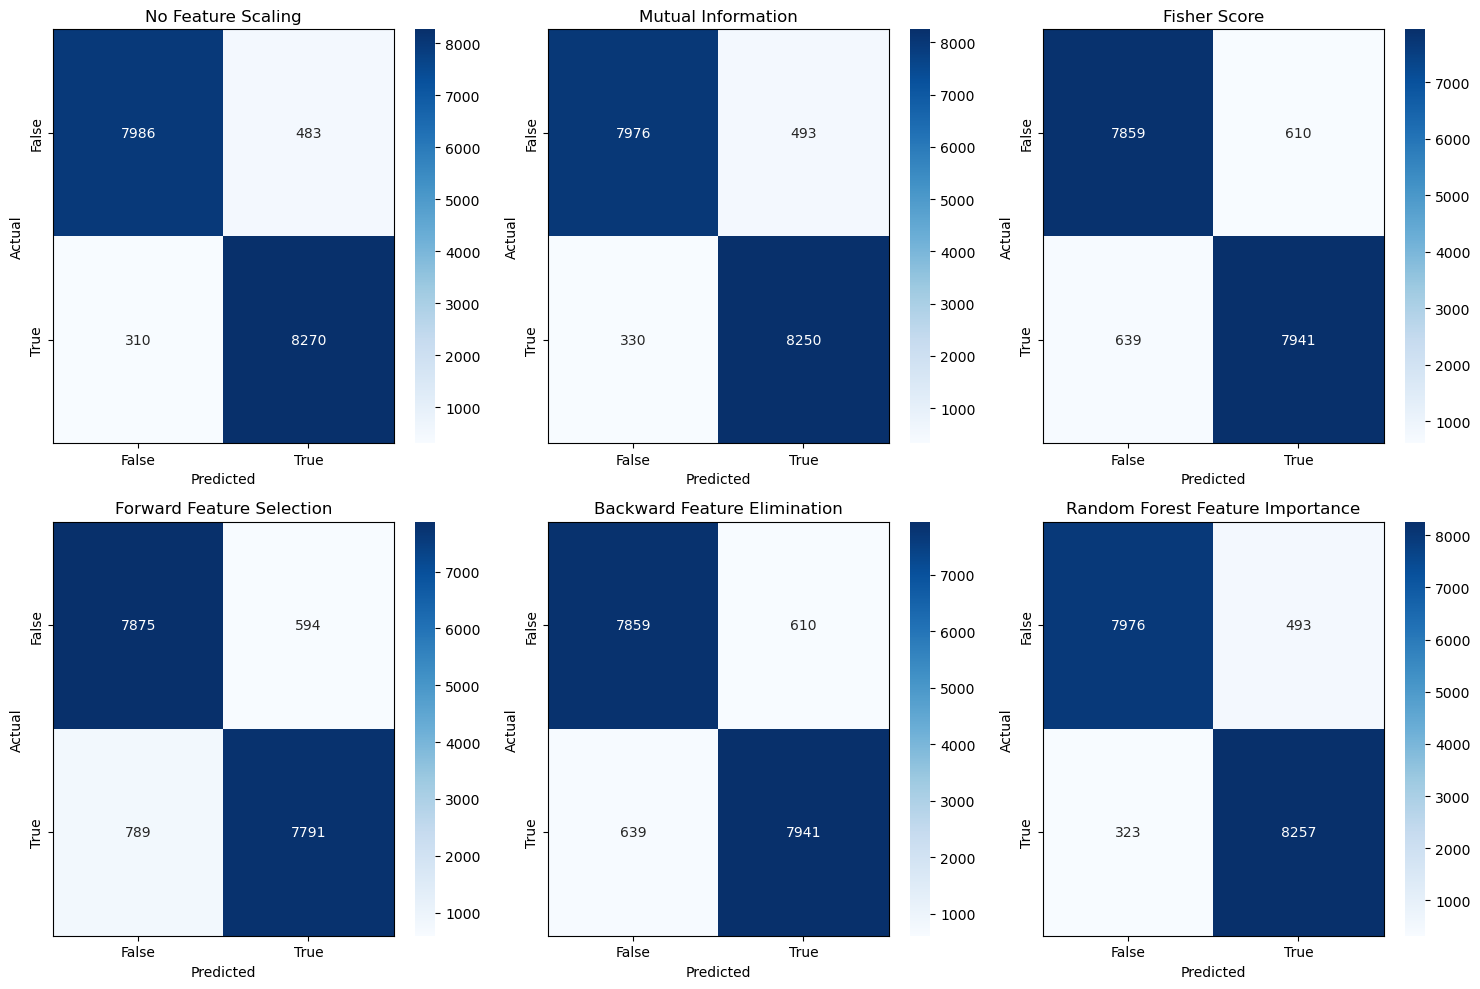

In [150]:
# Initialize cms as an empty dictionary
cms = {}
# Generate confusion matrices for each prediction
models =["No Feature Scaling", "Mutual Information", "Fisher Score", "Forward Feature Selection", "Backward Feature Elimination", 
          "Random Forest Feature Importance"]
for i, Y_pred in enumerate([Y_pred19, Y_pred20, Y_pred21, Y_pred22, Y_pred23, Y_pred24]):
    cms[models[i]] = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrices using Seaborn
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (name, cm) in enumerate(cms.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'],
                yticklabels=['False', 'True'], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_xlabel('Predicted')
    axes[i // 3, i % 3].set_ylabel('Actual')
    axes[i // 3, i % 3].set_title(name)
    
    # Add borders
    axes[i // 3, i % 3].spines['top'].set_visible(True)
    axes[i // 3, i % 3].spines['right'].set_visible(True)
    axes[i // 3, i % 3].spines['bottom'].set_visible(True)
    axes[i // 3, i % 3].spines['left'].set_visible(True)

plt.tight_layout()
plt.show()


# K-Fold Cross Validation

In [151]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier

X = OSD.drop(columns=['stroke'])
y = OSD['stroke']

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost':XGBClassifier(random_state=42),
}

# Evaluate each model using K-fold cross-validation
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} Cross-Validation Scores:", scores)
    print(f"{model_name} Mean Accuracy:", scores.mean())
    print(f"{model_name} Standard Deviation:", scores.std())
    print("\n")
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print("\nK-Fold Cross-Validation Results:")
print(results_df)


Logistic Regression Cross-Validation Scores: [0.8143695  0.80938416 0.81451613 0.81173021 0.82184751 0.8111437
 0.81155595 0.81654201 0.8105294  0.80818302]
Logistic Regression Mean Accuracy: 0.8129801585100109
Logistic Regression Standard Deviation: 0.003801571649285069


Decision Tree Cross-Validation Scores: [0.95527859 0.96158358 0.95821114 0.95953079 0.95806452 0.9568915
 0.95512538 0.96172459 0.95673852 0.95703182]
Decision Tree Mean Accuracy: 0.9580180442862988
Decision Tree Standard Deviation: 0.002202961056404066


Random Forest Cross-Validation Scores: [0.97668622 0.97346041 0.97463343 0.9755132  0.97947214 0.97302053
 0.97374982 0.97712275 0.9760962  0.97228333]
Random Forest Mean Accuracy: 0.9752038013502897
Random Forest Standard Deviation: 0.00209201796545371


XGBoost Cross-Validation Scores: [0.95439883 0.94926686 0.95527859 0.9568915  0.95909091 0.94897361
 0.95365889 0.95380554 0.95615193 0.94823288]
XGBoost Mean Accuracy: 0.9535749538012427
XGBoost Standard Deviation

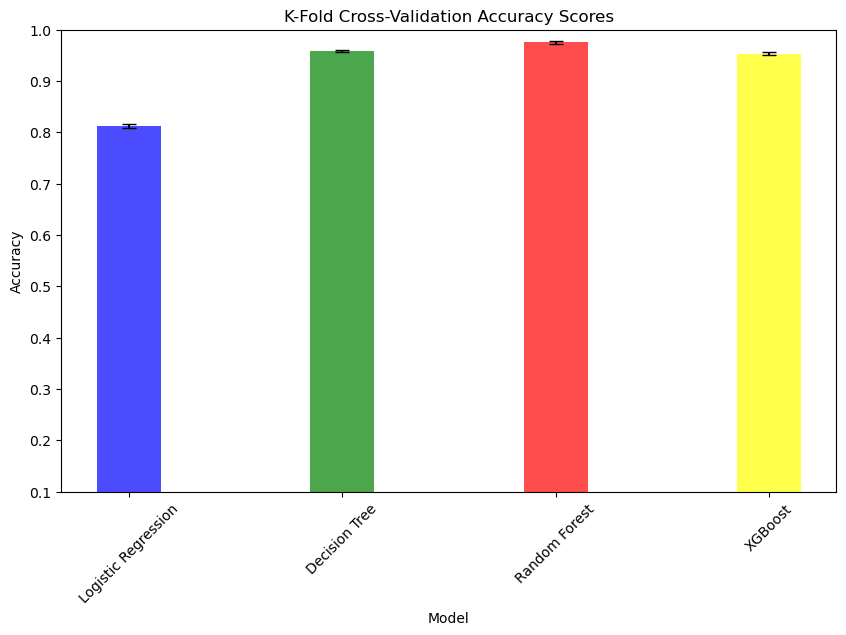

In [152]:
# Calculate mean and standard deviation of accuracy scores for each model
mean_scores = results_df.mean()
std_scores = results_df.std()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.3
plt.bar(mean_scores.index, mean_scores, yerr=std_scores, capsize=5, color=['blue', 'green', 'red','yellow'], alpha=0.7, width=bar_width)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation Accuracy Scores')
plt.ylim(0.1,1) 
plt.xticks(rotation=45)
plt.show()


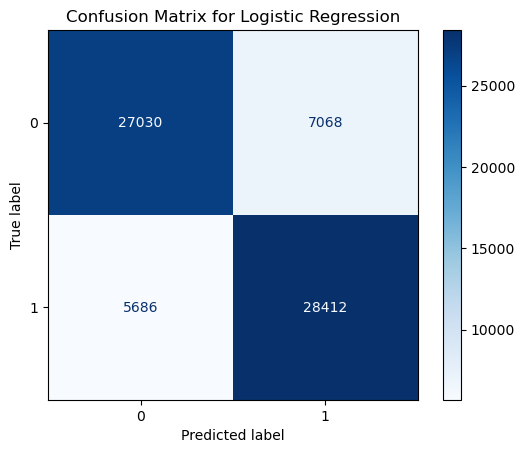

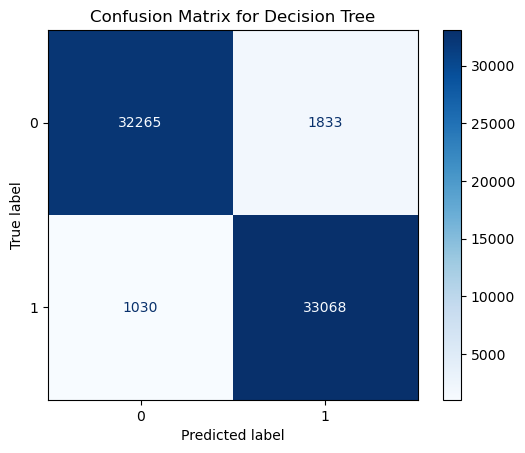

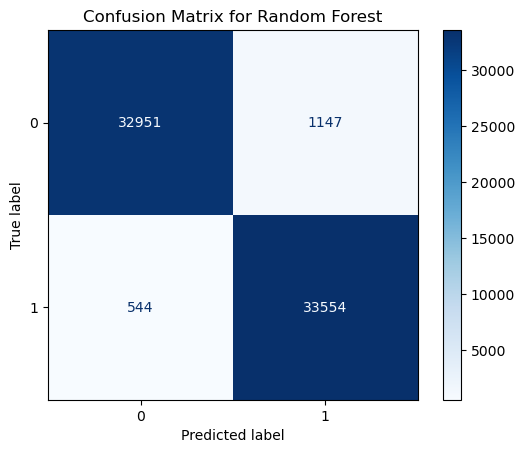

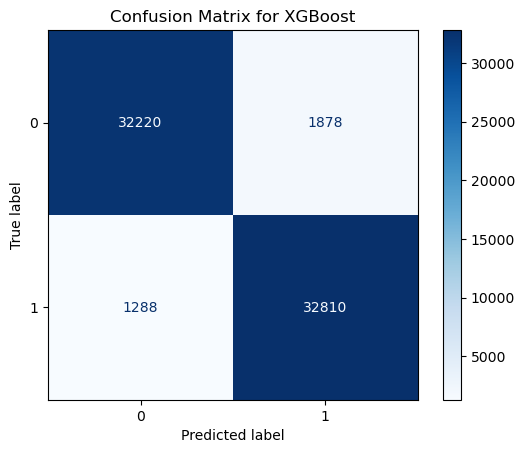

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_predict
# Evaluating each model using K-fold cross-validation and generate confusion matrices
for model_name, model in models.items():
    y_pred = cross_val_predict(model, X, y, cv=kf)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


In [154]:
# Given values
lr_correct = 28361
dtc_correct = 33068
rf_correct = 33554
xg_correct = 32810
total_minority_samples = 34098

# Calculate accuracy percentages
lr_accuracy = (lr_correct / total_minority_samples) * 100
dtc_accuracy = (dtc_correct / total_minority_samples) * 100
rf_accuracy = (rf_correct / total_minority_samples) * 100
xg_accuracy = (xg_correct / total_minority_samples) * 100

# Print the results
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}%")
print(f"Decision Tree Accuracy: {dtc_accuracy:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")
print(f"XGBoost Accuracy: {xg_accuracy:.2f}%")


Logistic Regression Accuracy: 83.17%
Decision Tree Accuracy: 96.98%
Random Forest Accuracy: 98.40%
XGBoost Accuracy: 96.22%


In [155]:
from sklearn.metrics import f1_score
# Evaluate each model using K-fold cross-validation and calculate F1 score
results = {}
for model_name, model in models.items():
    f1_scores = cross_val_score(model, X, y, cv=kf, scoring='f1')
    results[model_name] = f1_scores
    print(f"{model_name} F1 Score:", f1_scores.mean())
    

Logistic Regression F1 Score: 0.8166760511737836
Decision Tree F1 Score: 0.9584977203514509
Random Forest F1 Score: 0.9754251469271008
XGBoost F1 Score: 0.953985765926979


In [156]:
Final_data=pd.DataFrame({'Models':['Logistic Regression','Decision Tree Classifier','Random Forest','XGBoost'],
                         'Percentage Of Correctly Predicted Minority Class':[83.17 ,96.98,98.40,96.22],
                         'F1 Score':[0.8158196696068897,0.9584977203514509,0.9754251469271008,0.953985765926979 ],
                         })
Final_data

,Models,Percentage Of Correctly Predicted Minority Class,F1 Score
0,Logistic Regression,83.17,0.815820
1,Decision Tree Classifier,96.98,0.958498
2,Random Forest,98.40,0.975425
3,XGBoost,96.22,0.953986


# Model Selection

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X,Y)

RandomForestClassifier()

In [161]:
import pandas as pd

new_data=pd.DataFrame({
    'gender':1,
    'age':42,
    'hypertension':0,
    'heart_disease':0,
    'ever_married':1,
    'work_type':2,
    'Residence_type':1,
    'avg_glucose_level':81.89,
    'bmi':42.8,
    'smoking_status':2,
},index=[0])

new_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,42,0,0,1,2,1,81.89,42.8,2


In [162]:
import joblib

joblib.dump(xgboost_model,'stroke_model.pkl')

model=joblib.load('stroke_model.pkl')

model.predict(new_data)

array([0])